In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

In [28]:
ad = sc.read('../data/h5ad/20200114/fetal_skin.myeloid.doublet_removed_processed.20200114.h5ad')

Only considering the two last: ['.20200114', '.h5ad'].
Only considering the two last: ['.20200114', '.h5ad'].


In [47]:
ad1 = sc.read('../data/h5ad/20191205/fetal_skin.monocytes.processed.20191205.h5ad')

Only considering the two last: ['.20191205', '.h5ad'].
Only considering the two last: ['.20191205', '.h5ad'].


In [48]:
ad1

AnnData object with n_obs × n_vars = 11563 × 19884 
    obs: 'bh_doublet_pval', 'cell_caller', 'cluster_scrublet_score', 'doublet_pval', 'mt_prop', 'n_counts', 'n_genes', 'sanger_id', 'scrublet_score', 'chemistry', 'donor', 'gender', 'pcw', 'sorting', 'sample', 'chemistry_sorting', 'annot', 'hierarchy1', 'rachel_annot1', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'leiden_hm_r0_1', 'leiden_hm_r0_2', 'leiden_hm_r0_3', 'leiden_hm_r0_4', 'leiden_hm_r0_5', 'leiden_bk_r0_1', 'leiden_bk_r0_2', 'leiden_bk_r0_3', 'leiden_bk_r0_4', 'leiden_bk_r0_5'
    var: 'gene_ids', 'cc', 'mito', 'ribo', 'hb', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'hvg_full'
    uns: 'leiden', 'neighbors', 'neighbors_bk', 'neighbors_hm', 'pca'
    obsm: 'X_pca', 'X_pca_hm', 'X_umap_hm', 'X_umap_bk'
    varm: 'PCs'

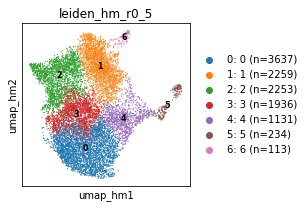

In [56]:
ss.lib.plot_embedding(ad1, basis='umap_hm', groupby='leiden_hm_r0_5', figsize=(3,3), size=5)

In [51]:
ss.lib.leiden(ad1, use_graph='neighbors_hm', restrict_to=('leiden_hm_r0_5', ('5',)), resolution=0.1, key_added='hm_split1')

['leiden_hm_split1']

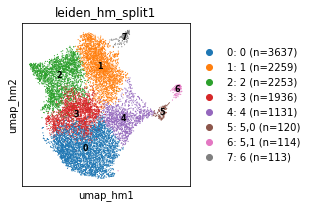

In [57]:
ss.lib.plot_embedding(ad1, basis='umap_hm', groupby='leiden_hm_split1', figsize=(3,3), size=5)

In [78]:
ad1.obs['rachel_annot3'] = ss.lib.regroup(ad1, groupby='leiden_hm_split1', regroups={
    'Monocyte': '0',
    'Monocyte (activated/differentiating?)': '3',
    'Neut-myeloid progenitor': '4',
    'Neutrophils1': '5,0',
    'Neutrophils2': '5,1',
    'DC2': '1',
    'ASDC': '6',
    'Mac doublets': '2',
})

In [59]:
asdc_cells = ad1.obs_names[ad1.obs.rachel_annot3=='ASDC']

In [61]:
ad.obs['is_asdc'] = ad.obs_names.isin(asdc_cells)
ad.obs['is_asdc'] = ad.obs['is_asdc'].astype('category')

In [82]:
ad.obs = ad.obs.merge(ad1.obs[['rachel_annot3']], how='left', left_index=True, right_index=True)

In [87]:
ad.obs['rachel_annot3_y'] = ad.obs['rachel_annot3_y'].astype('str').astype('category')

In [33]:
ss.lib.leiden(ad, use_graph='neighbors_hm', restrict_to=('leiden_hm_r0_4', ('7',)), resolution=0.3, key_added='hm_split1')

['leiden_hm_split1']

In [39]:
ss.lib.leiden(ad, use_graph='neighbors_hm', restrict_to=('leiden_hm_split1', ('2',)), resolution=0.2, key_added='hm_split2')

['leiden_hm_split2']

In [93]:
ss.lib.leiden(ad, use_graph='neighbors_hm', restrict_to=('leiden_hm_split2', ('9',)), resolution=0.2, key_added='hm_split3')

['leiden_hm_split3']

In [108]:
ss.lib.leiden(ad, use_graph='neighbors_hm', restrict_to=('leiden_hm_split3', ('1',)), resolution=0.2, key_added='hm_split4')

['leiden_hm_split4']

In [118]:
ss.lib.leiden(ad, use_graph='neighbors_hm', restrict_to=('leiden_hm_split4', ('1,1',)), resolution=0.5, key_added='hm_split5')

['leiden_hm_split5']

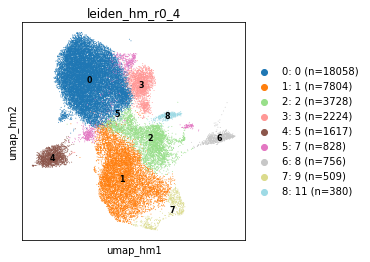

In [32]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_r0_4', palette='tab20')

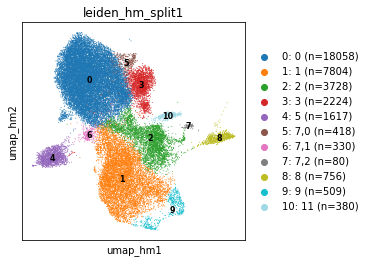

In [34]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_split1', palette='tab20')

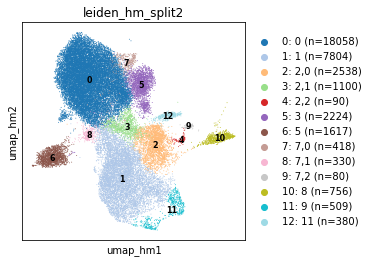

In [40]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_split2', palette='tab20')

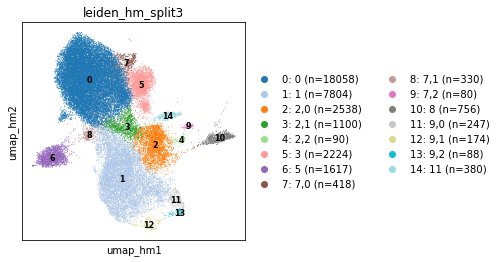

In [94]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_split3', palette='tab20')

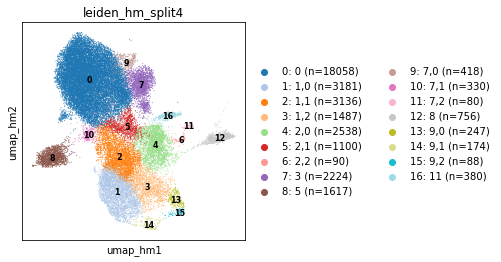

In [109]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_split4', palette='tab20')

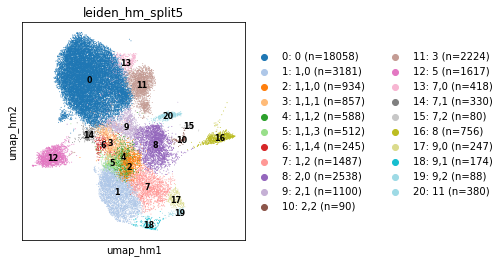

In [119]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_split5', palette='tab20')

In [120]:
ss.lib.cross_table(ad, 'rachel_annot3_y', 'leiden_hm_split5', highlight=1)

leiden_hm_split5,0,"1,0","1,1,0","1,1,1","1,1,2","1,1,3","1,1,4","1,2","2,0","2,1","2,2",3,5,"7,0","7,1","7,2",8,"9,0","9,1","9,2",11
rachel_annot3_y,,,,,,,,,,,,,,,,,,,,,
ASDC,0,0,0,0,0,0,0,0,20,0,89,0,0,0,0,0,3,0,0,0,0
DC2,0,0,43,3,0,4,0,39,2116,25,0,9,1,0,0,0,8,0,0,0,8
Mac doublets,69,62,180,628,30,71,224,14,272,624,0,10,17,4,6,0,1,1,4,0,27
Monocyte,0,2848,141,25,25,70,1,485,1,0,0,0,0,0,0,0,0,0,39,0,0
Monocyte (activated/differentiating?),6,262,547,59,499,355,4,108,36,12,0,44,0,1,0,0,0,0,1,0,0
Neut-myeloid progenitor,0,6,3,0,3,0,0,825,63,0,0,0,0,0,0,0,1,219,2,4,0
Neutrophils1,0,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,20,12,82,0
Neutrophils2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,113,0,0
nan,17983,3,20,142,31,12,16,11,29,439,1,2161,1599,413,324,80,743,7,3,2,345


In [131]:
ad.obs['rachel_annot3'] = ss.lib.regroup(ad, groupby='leiden_hm_split5', regroups={
    'Macrophage1': '0',
    'Macrophage2': '3',
    'Activated mac?': '7,1',
    'Monocyte': '1,0',
    'Monocyte (activated/differentiating?)': ['1,1,0', '1,1,2', '1,1,3'],
    'Neut-myeloid progenitor': ['1,2', '9,0'],
    'Neutrophil1': '9,2',
    'Neutrophil2': '9,1',
    'Microglia': '5',
    'DC1': '8',
    'DC2': ['2,0'],
    'ASDC?': '2,2',
    'Inflammatory DC?': '7,2',
    'LC': '11',
    'Mac-mono': ['1,1,1', '1,1,4', '2,1'],
    'Skeletal muscle? doublet': '7,0',
})

In [132]:
ad.obs.rachel_annot3.value_counts()

Macrophage1                              18058
Monocyte                                  3181
DC2                                       2538
Macrophage2                               2224
Mac-mono                                  2202
Monocyte (activated/differentiating?)     2034
Neut-myeloid progenitor                   1734
Microglia                                 1617
DC1                                        756
Skeletal muscle? doublet                   418
LC                                         380
Activated mac?                             330
Neutrophil2                                174
ASDC?                                       90
Neutrophil1                                 88
Inflammatory DC?                            80
Name: rachel_annot3, dtype: int64

In [133]:
ad2 = ad[~ad.obs.rachel_annot3.str.endswith('doublet'), :].copy()

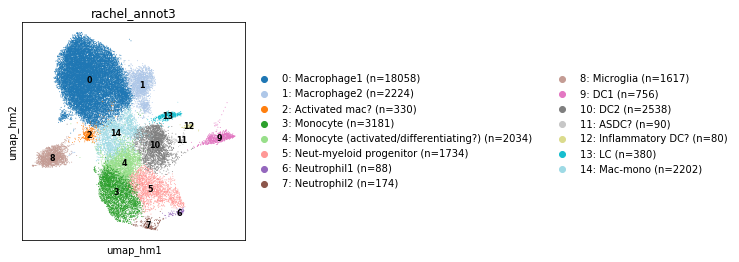

In [134]:
ss.lib.clear_colors(ad2)
ss.lib.plot_embedding(ad2, basis='umap_hm', groupby='rachel_annot3', palette='tab20')

In [135]:
ss.lib.clear_colors(ad2)

In [136]:
ad.write('fetal_skin.myeloid.doublet_removed_processed.20200403.h5ad', compression='lzf')

In [2]:
ad = sc.read('fetal_skin.myeloid.doublet_removed_processed.20200403.h5ad')

Only considering the two last: ['.20200403', '.h5ad'].
Only considering the two last: ['.20200403', '.h5ad'].


In [7]:
genes = ['CD83', 'RELB', 'CD86', 'CD40', 'SOCS1', 'ALDH1A2', 'FAS', 'CD200', 'PDCD1LG2', 'CD274']

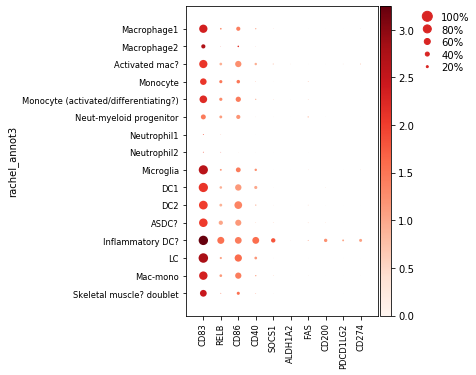

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[3.5, 0, 0.2, 0.5, 0.25])

In [9]:
sc.pl.dotplot(ad, genes, groupby='rachel_annot3', mean_only_expressed=True)